In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!git clone https://github.com/laxmimerit/Data-Files-for-Feature-Selection.git

Cloning into 'Data-Files-for-Feature-Selection'...
remote: Enumerating objects: 17, done.
remote: Total 17 (delta 0), reused 0 (delta 0), pack-reused 17
Unpacking objects: 100% (17/17), done.


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

In [4]:
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [5]:
data = pd.read_csv('/content/Data-Files-for-Feature-Selection/santander-train.csv')
data

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,...,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,...,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,300.0,122.22,300.0,240.75,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3.00,2.07,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,195.0,195.0,0.0,0.0,195.0,0.0,0.0,195.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,91.56,138.84,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,...,40501.08,13501.47,0.0,0.0,0.0,0.0,0.00,0.0,85501.89,85501.89,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76015,151829,2,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60926.490000,0
76016,151830,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,...,0.00,0.00,0.0,0.0,0.0,0.0,15498.42,0.0,48175.62,31837.02,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [6]:
X = data.drop('TARGET', axis=1)
Y = data['TARGET']

In [7]:
X.shape, Y.shape

((76020, 370), (76020,))

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [9]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60816, 370), (60816,), (15204, 370), (15204,))

**Remove constant, Quasi constant, duplicate features**

In [10]:
constant_filter = VarianceThreshold(threshold=0.01)
constant_filter.fit(x_train)
x_train_filter = constant_filter.transform(x_train)
x_test_filter = constant_filter.transform(x_test)

In [11]:
x_train_T = x_train_filter.T
x_test_T = x_test_filter.T

In [12]:
x_train_T = pd.DataFrame(x_train_T)
x_test_T = pd.DataFrame(x_test_T)

In [13]:
x_train_T.duplicated().sum()

16

In [14]:
duplicated_features = x_train_T.duplicated()

In [15]:
duplicated_features

0      False
1      False
2      False
3      False
4      False
       ...  
262    False
263    False
264    False
265    False
266    False
Length: 267, dtype: bool

In [16]:
features_to_keep = [not index for index in duplicated_features]

In [17]:
x_train_unique = x_train_T[features_to_keep].T
x_test_unique = x_test_T[features_to_keep].T

In [19]:
x_train_unique.shape, x_test_unique.shape, x_train.shape, x_test.shape

((60816, 251), (15204, 251), (60816, 370), (15204, 370))

**Calculate the Mutual Information**

In [20]:
mi = mutual_info_classif(x_train_unique, y_train)

In [21]:
len(mi)

251

In [22]:
mi

array([5.51048483e-05, 0.00000000e+00, 1.28989999e-02, 8.04678925e-04,
       1.27237796e-03, 9.80429405e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.47597174e-04, 1.47748817e-04,
       0.00000000e+00, 1.02799003e-03, 0.00000000e+00, 4.57251905e-04,
       4.01927072e-04, 8.43695011e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.25333702e-02, 1.53300114e-02, 1.55535307e-03,
       0.00000000e+00, 2.76975892e-03, 3.58303499e-04, 5.97354932e-04,
       7.21392639e-04, 4.14590257e-04, 1.84431737e-03, 6.12878288e-04,
       0.00000000e+00, 1.62463159e-03, 0.00000000e+00, 0.00000000e+00,
       6.89833391e-04, 2.90936359e-04, 1.73874163e-02, 0.00000000e+00,
       6.28901785e-05, 1.11890959e-02, 1.30002626e-05, 1.10802044e-02,
       7.36793915e-04, 0.00000000e+00, 1.35544150e-02, 1.23372197e-02,
       1.61814504e-02, 0.00000000e+00, 0.00000000e+00, 1.04272975e-03,
       6.73010910e-04, 1.05939517e-03, 0.00000000e+00, 1.23753717e-03,
      

In [23]:
mi = pd.Series(mi)
mi.index = x_train_unique.columns

In [24]:
mi

0      0.000055
1      0.000000
2      0.012899
3      0.000805
4      0.001272
         ...   
262    0.000370
263    0.000000
264    0.000000
265    0.000503
266    0.001995
Length: 251, dtype: float64

In [25]:
mi.sort_values(ascending=False, inplace=True)

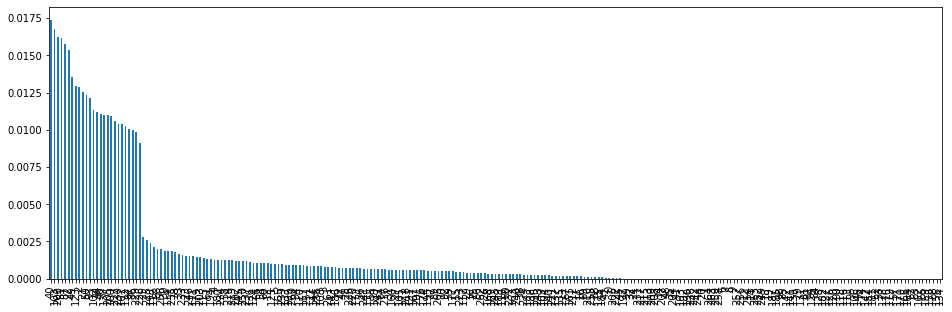

In [26]:
mi.plot.bar(figsize=(16,5)) # individually in univariate methods, the features after some (~70%) are not adding values in classification

In [27]:
#select top 10% percentile features
sel = SelectPercentile(mutual_info_classif,percentile=10).fit(x_train_unique, y_train)
x_train_unique.columns[sel.get_support()]

Int64Index([  2,  21,  22,  40,  44,  46,  49,  50,  51,  86,  87,  93,  97,
            100, 102, 103, 107, 123, 130, 200, 205, 227, 228, 229, 230],
           dtype='int64')

In [28]:
len(x_train_unique.columns[sel.get_support()])

25

In [29]:
x_train_mi = sel.transform(x_train_unique)
x_test_mi = sel.transform(x_test_unique)

In [30]:
x_train_mi.shape, x_test_mi.shape

((60816, 25), (15204, 25))

**Build a classifier to compare the performance**

In [32]:
def run_randomForest(x_train, x_test, y_train, y_test):
  clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)
  print('Accuracy on test set: ', accuracy_score(y_test, y_pred))

In [33]:
%%time
run_randomForest(x_train_mi, x_test_mi, y_train, y_test)

Accuracy on test set:  0.9565903709550119
CPU times: user 11.6 s, sys: 58.7 ms, total: 11.7 s
Wall time: 6.07 s


In [34]:
%%time
run_randomForest(x_train, x_test, y_train, y_test)

Accuracy on test set:  0.9570507761115495
CPU times: user 32.1 s, sys: 68.2 ms, total: 32.2 s
Wall time: 16.6 s


**Mutual information gain in regression**

In [37]:
boston = load_boston()

In [38]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [39]:
X = pd.DataFrame(data = boston.data, columns= boston.feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [40]:
Y = boston.target

In [41]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [42]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [43]:
mi = mutual_info_regression(x_train, y_train)

In [44]:
len(mi)

13

In [45]:
mi = pd.Series(mi)
mi.index = x_train.columns
mi

CRIM       0.358119
ZN         0.195956
INDUS      0.516306
CHAS       0.008876
NOX        0.450497
RM         0.559817
AGE        0.347031
DIS        0.322173
RAD        0.209136
TAX        0.381661
PTRATIO    0.483576
B          0.150531
LSTAT      0.680529
dtype: float64

In [46]:
mi.sort_values(ascending=False, inplace=True)

In [47]:
mi

LSTAT      0.680529
RM         0.559817
INDUS      0.516306
PTRATIO    0.483576
NOX        0.450497
TAX        0.381661
CRIM       0.358119
AGE        0.347031
DIS        0.322173
RAD        0.209136
ZN         0.195956
B          0.150531
CHAS       0.008876
dtype: float64

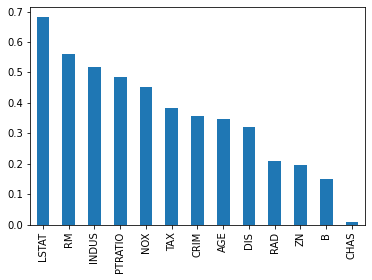

In [48]:
mi.plot.bar()

In [49]:
sel = SelectKBest(mutual_info_regression, k=9).fit(x_train, y_train)
x_train.columns[sel.get_support()]

Index(['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'LSTAT'], dtype='object')

In [50]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [51]:
r2_score(y_test, y_pred)

0.5892223849182512

In [52]:
np.sqrt(mean_squared_error(y_test, y_pred))

5.783509315085133

In [55]:
np.std(Y) # MSE is less than the standard deviation of the house prices of Y which is great

9.188011545278203

In [56]:
x_train_9 = sel.transform(x_train)
x_test_9 = sel.transform(x_test)

In [57]:
model = LinearRegression()
model.fit(x_train_9, y_train)
y_pred = model.predict(x_test_9)

np.sqrt(mean_squared_error(y_test, y_pred))

6.175103151293748

In [58]:
r2_score(y_test, y_pred)

0.5317127606961575